In [1]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

/tmp/ipykernel_84304/1958645080.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Receive data using Yahoo Finance
data = yf.download(tickers='BTC-USD', period='60d', interval='15m', auto_adjust=True)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-03-21 10:00:00,27987.414062,28068.486328,27965.173828,28051.876953,59523072
2023-03-21 10:15:00,28034.791016,28194.070312,28020.283203,28104.726562,202174464
2023-03-21 10:30:00,28097.199219,28116.369141,28051.958984,28080.367188,34295808
2023-03-21 10:45:00,28085.212891,28085.212891,28012.597656,28012.597656,19353600
2023-03-21 11:00:00,28008.880859,28053.376953,27984.285156,27988.882812,7172096


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5620 entries, 2023-01-21 00:00:00 to 2023-03-21 11:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5620 non-null   float64
 1   High    5620 non-null   float64
 2   Low     5620 non-null   float64
 3   Close   5620 non-null   float64
 4   Volume  5620 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 263.4 KB


In [5]:
# Display the count of null values
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
# Drop the missing values
data.dropna(inplace=True)

# Print the number of rows in the dataframe
print('Number of rows: ', data.shape[0])

# Display the count of null values
data.isna().sum()

Number of rows:  5620


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
# Display the count of duplicate values
print(data.duplicated().value_counts())

False    5620
dtype: int64


In [24]:
# Show outliers function
def show_outliers(data):
    # Calculate the percentage change
    data['returns'] = data['Close'].pct_change()
    
    # Plot the percentage change
    plt.figure(figsize=(10,7))
    data['returns'].plot()
    
    # Set the title and axes label
    plt.title('Returns', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Percentage Change', fontsize=12)
    
    # Show the plot
    plt.show()
    
    # Drop a column 'returns'
    data.drop('returns', axis=1, inplace=True)

In [25]:
# Aggregate function
ohlcv_dict = {'Open': 'first',
             'High': 'max',
             'Low': 'min',
             'Close': 'last',
             'Volume': 'sum'
             }

# Resample data to 30 minutes data
data_30M = data.resample('30T').agg(ohlcv_dict)

# Display the first 5 rows
data_30M.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-21 00:00:00,22677.427734,22698.910156,22511.833984,22593.183594,981401600
2023-01-21 00:30:00,22588.441406,22624.162109,22588.441406,22598.414062,301957120
2023-01-21 01:00:00,22595.808594,22612.597656,22582.277344,22606.009766,146145280
2023-01-21 01:30:00,22603.859375,22611.310547,22574.078125,22580.519531,28549120
2023-01-21 02:00:00,22579.144531,22623.292969,22574.574219,22623.292969,99555328


In [26]:
# Resample data to 1 hour data
data_1h = data.resample('1H').agg(ohlcv_dict)

# Display the first 5 rows
data_1h.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-01-21 00:00:00,22677.427734,22698.910156,22511.833984,22598.414062,1283358720
2023-01-21 01:00:00,22595.808594,22612.597656,22574.078125,22580.519531,174694400
2023-01-21 02:00:00,22579.144531,22625.578125,22550.539062,22562.066406,202541056
2023-01-21 03:00:00,22560.505859,22569.328125,22528.972656,22563.695312,249407488
2023-01-21 04:00:00,22562.355469,22628.968750,22553.804688,22600.304688,202848256


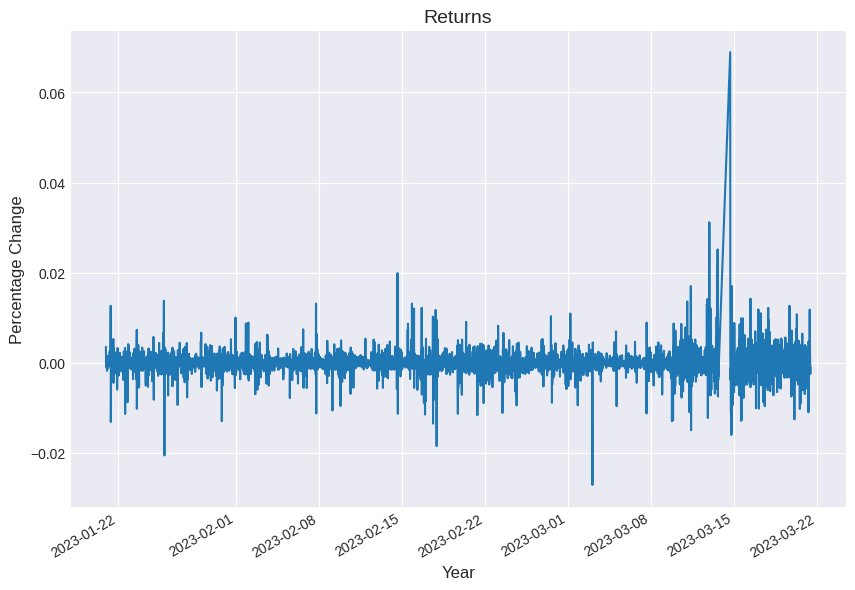

In [27]:
show_outliers(data)

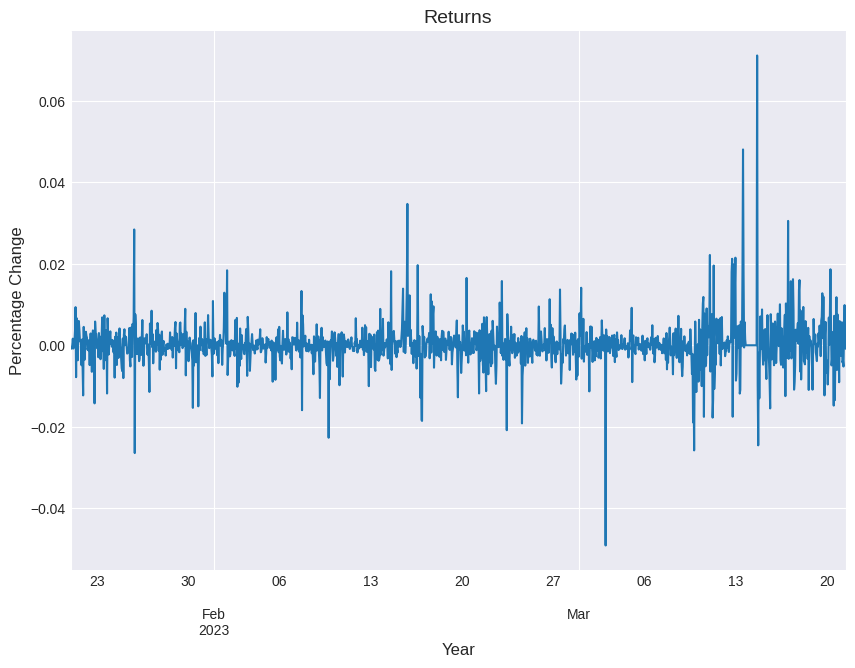

In [29]:
show_outliers(data_1h)

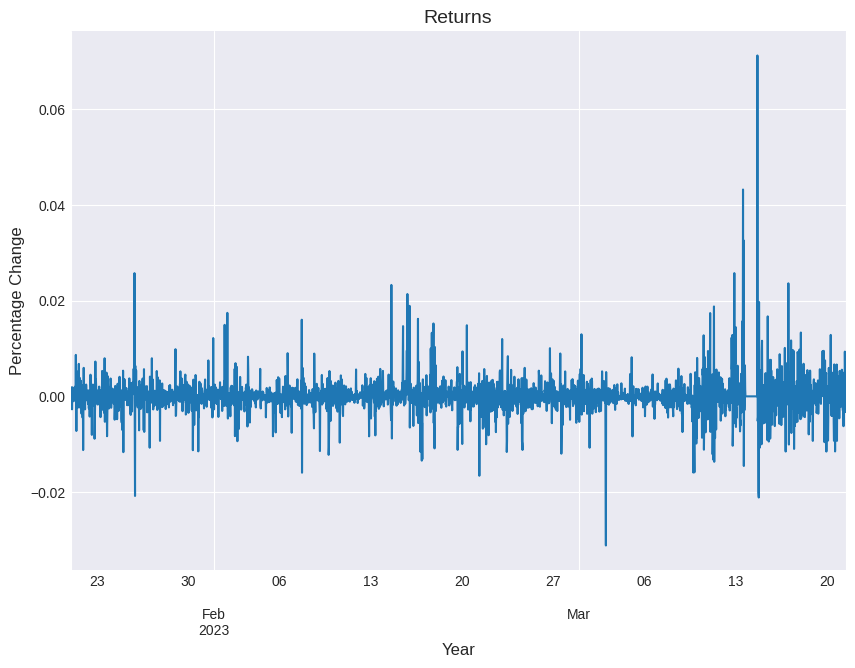

In [28]:
show_outliers(data_30M)

In [30]:
# Save the data
data_30M.to_csv('btc_30m.csv')